<a href="https://colab.research.google.com/github/Jim030123/BTMH1013_ASG/blob/main/BTMH1013_2024C_Assignment_B240048A_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q4(a) Data loading and preprocessing

In [ ]:
!pip install chardet

In [ ]:
import pandas as pd
import chardet
import csv

from google.colab import drive
drive.mount('/content/drive')

import os

file_path = "/content/drive/MyDrive/BTMH1023/Open Transaction Data.csv"

# Read the CSV file path


try:
    # First detect the file encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']

    # Read CSV with detected encoding and tab separator
    data = pd.read_csv(
        file_path,
        encoding=encoding,
        sep='\t',  # Using tab as separator since data appears tab-delimited
        on_bad_lines='skip'
    )
    print("Columns:", [f"'{col}'" for col in data.columns])
except Exception as e:
    print(f"Error: {e}")
    print("Please check the CSV file manually.")
    exit()

# Clean column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()
print("\nCleaned Columns:", [f"'{col}'" for col in data.columns])

# Standardize column names
data.columns = data.columns.str.title()
print("\nStandardized Columns:", [f"'{col}'" for col in data.columns])

# Clean the Transaction Price column by removing 'RM' and ',' and converting to float
data['Transaction Price'] = data['Transaction Price'].str.replace('RM', '').str.replace(',', '').astype(float)

# Rename columns if necessary
data = data.rename(columns={
    'Mukim': 'State',  # Using Mukim as State for this analysis
})

print("\nRenamed Columns:", [f"'{col}'" for col in data.columns])

# Verify required columns
required_columns = ['State', 'Property Type', 'Transaction Price']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"\nMissing columns after renaming: {missing_columns}")
    print("Please verify the column names in the CSV file.")
    exit()
else:
    print("\nAll required columns are present.")

# Handle missing values in required columns
data = data.dropna(subset=['State', 'Property Type', 'Transaction Price'])

# Calculate mean and median prices grouped by State and Property Type
stats_by_state = data.groupby(['State', 'Property Type']).agg({
    'Transaction Price': ['mean', 'median']
}).reset_index()

# Flatten column names
stats_by_state.columns = ['State', 'Property Type', 'Mean Price', 'Median Price']
print("\nMean and Median Transaction Prices by State:")
print(stats_by_state)

# Calculate average and median prices by Property Type
category_stats = data.groupby('Property Type').agg({
    'Transaction Price': ['mean', 'median']
}).reset_index()

# Flatten column names
category_stats.columns = ['Property Type', 'Mean Price', 'Median Price']
print("\nMean and Median Prices by Property Type:")
print(category_stats)

# Save results for state-wise statistics
output_file_path = '/content/drive/MyDrive/BTMH1023/transaction_prices_stats_by_state.csv'
stats_by_state.to_csv(output_file_path, index=False)
print(f"\nTransaction price statistics by state saved to {output_file_path}")

# Save results for category-wise statistics
category_output_path = '/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv'
category_stats.to_csv(category_output_path, index=False)
print(f"Price statistics by category saved to {category_output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns: ["'Property Type'", "'District'", "'Mukim'", "'Scheme Name/Area'", "'Road Name'", "'Month, Year of Transaction Date'", "'Tenure'", "'Land/Parcel Area'", "'Unit'", "'Main Floor Area'", "'Unit        '", "'Unit Level'", "'Transaction Price  '", "'Unnamed: 13'"]

Cleaned Columns: ["'Property Type'", "'District'", "'Mukim'", "'Scheme Name/Area'", "'Road Name'", "'Month, Year of Transaction Date'", "'Tenure'", "'Land/Parcel Area'", "'Unit'", "'Main Floor Area'", "'Unit'", "'Unit Level'", "'Transaction Price'", "'Unnamed: 13'"]

Standardized Columns: ["'Property Type'", "'District'", "'Mukim'", "'Scheme Name/Area'", "'Road Name'", "'Month, Year Of Transaction Date'", "'Tenure'", "'Land/Parcel Area'", "'Unit'", "'Main Floor Area'", "'Unit'", "'Unit Level'", "'Transaction Price'", "'Unnamed: 13'"]

Renamed Columns: ["'Property Type'", "'District'", "'State'"

Q4 (b) Exploratory data analysis to understand the distribution of the data and relationships between features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-2c7ba5d1e456>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
<ipython-input-6-2c7ba5d1e456>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


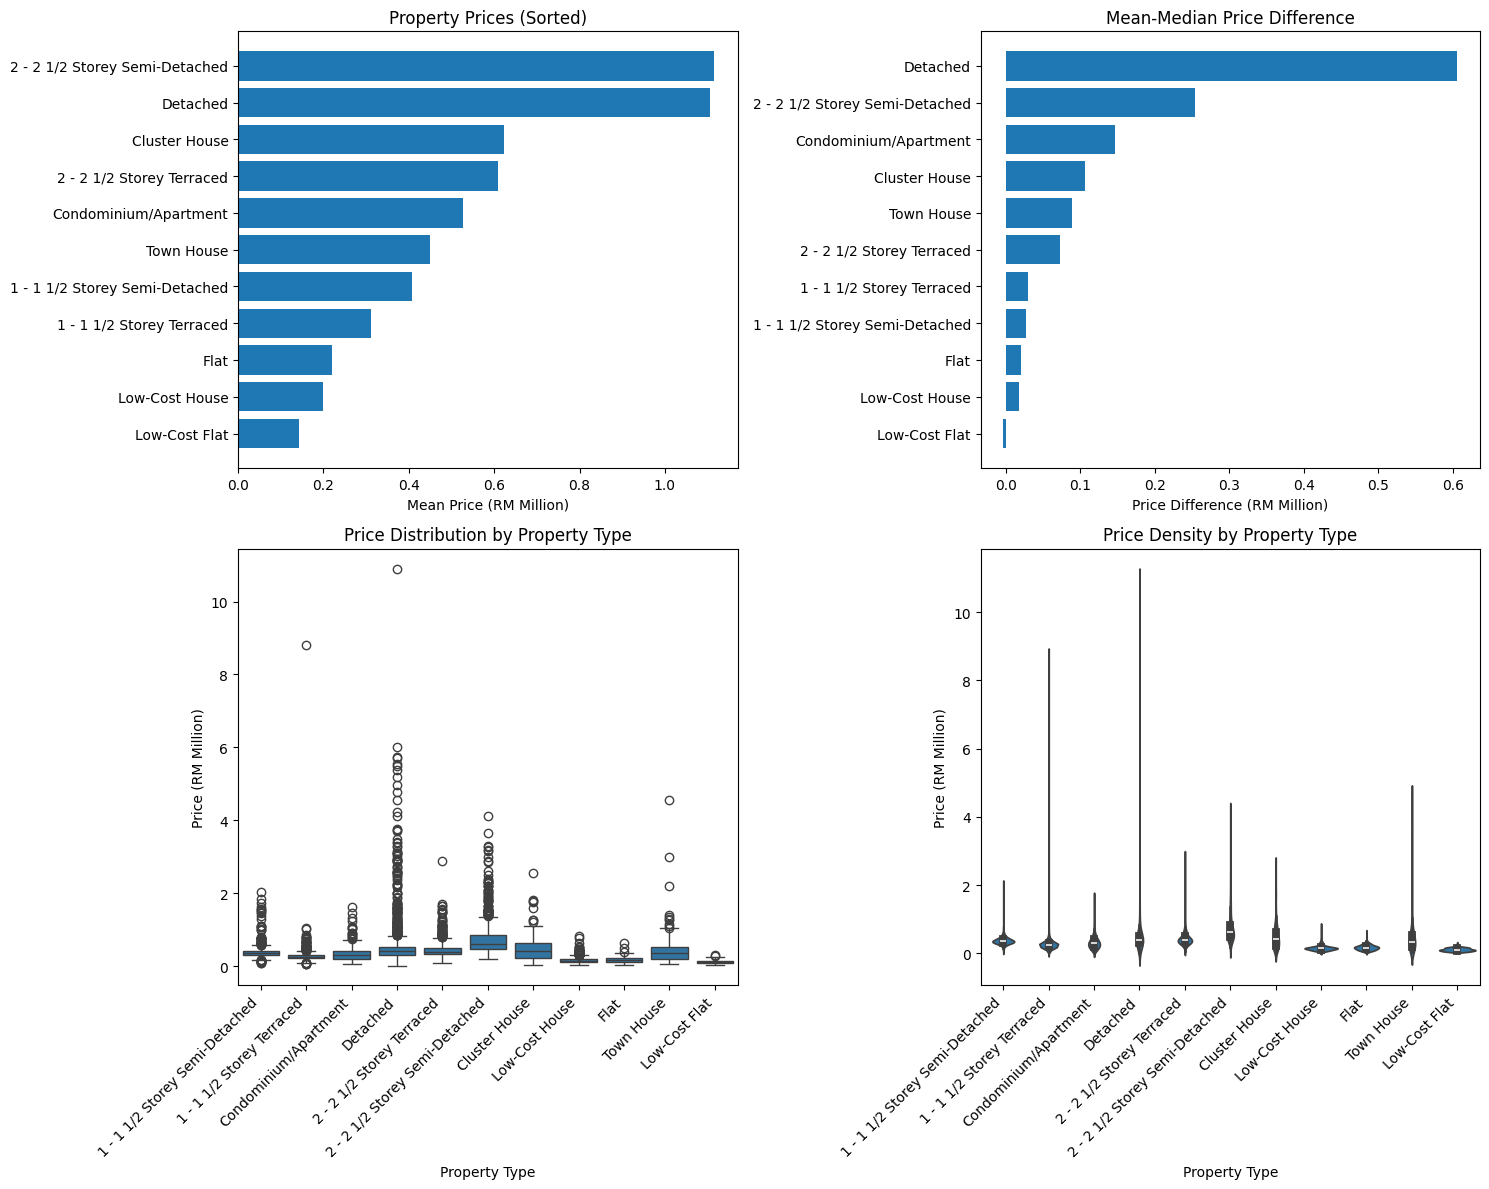

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import os


# Read and prepare data
df = pd.read_csv('/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv')
df_states = pd.read_csv('/content/drive/MyDrive/BTMH1023/transaction_prices_stats_by_state.csv')
df_states['Mean Price'] = pd.to_numeric(df_states['Mean Price'], errors='coerce')

# Create figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Horizontal bar chart (sorted)
df_sorted = df.sort_values('Mean Price', ascending=True)
ax1.barh(df_sorted['Property Type'], df_sorted['Mean Price']/1000000)
ax1.set_xlabel('Mean Price (RM Million)')
ax1.set_title('Property Prices (Sorted)')

# 2. Price difference plot (Mean - Median)
df['Price_Diff'] = df['Mean Price'] - df['Median Price']
df_sorted_diff = df.sort_values('Price_Diff', ascending=True)
ax2.barh(df_sorted_diff['Property Type'], df_sorted_diff['Price_Diff']/1000000)
ax2.set_xlabel('Price Difference (RM Million)')
ax2.set_title('Mean-Median Price Difference')

# 3. Box plot (using state data)
sns.boxplot(data=df_states, x='Property Type', y=df_states['Mean Price']/1000000, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_ylabel('Price (RM Million)')
ax3.set_title('Price Distribution by Property Type')

# 4. Violin plot
sns.violinplot(data=df_states, x='Property Type', y=df_states['Mean Price']/1000000, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.set_ylabel('Price (RM Million)')
ax4.set_title('Price Density by Property Type')

# Adjust layout and display
plt.tight_layout()
plt.show()

Q4(c) Model building

• Build a decision tree classifier to predict the type of house a worker can
afford.

• Build a random forest classifier to predict the type of house a worker
can afford.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data files
income_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/hh_income_district.csv')
house_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv')

# Use only 2022 data at district level
income_2022_df = income_df[income_df['date'] == '2022-01-01']
district_income_df = income_2022_df[['state', 'district', 'income_mean', 'income_median']]
district_income_df['Annual Income (Mean)'] = district_income_df['income_mean'] * 12
district_income_df['Annual Income (Median)'] = district_income_df['income_median'] * 12

# Calculate maximum affordable house price (3x annual income) for both mean and median
district_income_df['Max Affordable Price (Mean)'] = district_income_df['Annual Income (Mean)'] * 3
district_income_df['Max Affordable Price (Median)'] = district_income_df['Annual Income (Median)'] * 3

# Create affordability analysis with both metrics
district_affordability = {}
for _, row in district_income_df.iterrows():
    district_key = f"{row['state']} - {row['district']}"
    max_price_mean = row['Max Affordable Price (Mean)']
    max_price_median = row['Max Affordable Price (Median)']

    affordable_properties_mean = house_df[house_df['Mean Price'] <= max_price_mean]['Property Type'].tolist()
    affordable_properties_median = house_df[house_df['Median Price'] <= max_price_median]['Property Type'].tolist()

    district_affordability[district_key] = {
        'State': row['state'],
        'District': row['district'],
        'Annual Income (Mean)': row['Annual Income (Mean)'],
        'Annual Income (Median)': row['Annual Income (Median)'],
        'Max Affordable Price (Mean)': max_price_mean,
        'Max Affordable Price (Median)': max_price_median,
        'Affordable Properties (Mean)': affordable_properties_mean,
        'Affordable Properties (Median)': affordable_properties_median
    }

# Visualization (showing top 20 districts by median max affordable price)
plt.figure(figsize=(15, 10))
sorted_districts = dict(sorted(district_affordability.items(),
                             key=lambda x: x[1]['Max Affordable Price (Median)'],
                             reverse=True)[:20])
districts = list(sorted_districts.keys())
max_prices_median = [data['Max Affordable Price (Median)'] for data in sorted_districts.values()]
max_prices_mean = [data['Max Affordable Price (Mean)'] for data in sorted_districts.values()]

# Create side-by-side bars
x = range(len(districts))
width = 0.35
plt.figure(figsize=(15, 10))
plt.barh([i - width/2 for i in x], max_prices_median, width, label='Median', color='skyblue')
plt.barh([i + width/2 for i in x], max_prices_mean, width, label='Mean', color='lightgreen')
plt.axvline(x=house_df['Median Price'].median(), color='r', linestyle='--', label='Median House Price')
plt.axvline(x=house_df['Mean Price'].mean(), color='g', linestyle='--', label='Mean House Price')
plt.yticks(x, districts)
plt.title('Maximum Affordable House Price by District (Top 20)')
plt.xlabel('Price (RM)')
plt.ylabel('District')
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BTMH1023/district_affordability_comparison.png')
plt.close()

# Print analysis results with both metrics
print("Housing Affordability Analysis by District")
print("=========================================")
for district_key, data in district_affordability.items():
    print(f"\nDistrict: {district_key}")
    print(f"Annual Income (Mean): RM {data['Annual Income (Mean)']:,.2f}")
    print(f"Annual Income (Median): RM {data['Annual Income (Median)']:,.2f}")
    print(f"Maximum Affordable Price (Mean): RM {data['Max Affordable Price (Mean)']:,.2f}")
    print(f"Maximum Affordable Price (Median): RM {data['Max Affordable Price (Median)']:,.2f}")
    print("Affordable Property Types (Based on Mean):")
    for prop in data['Affordable Properties (Mean)']:
        print(f"- {prop}")
    print("Affordable Property Types (Based on Median):")
    for prop in data['Affordable Properties (Median)']:
        print(f"- {prop}")

# Save results to CSV with both metrics
results = []
for district_key, data in district_affordability.items():
    affordable_properties_mean_str = ', '.join(data['Affordable Properties (Mean)']) if data['Affordable Properties (Mean)'] else 'None'
    affordable_properties_median_str = ', '.join(data['Affordable Properties (Median)']) if data['Affordable Properties (Median)'] else 'None'
    results.append({
        'State': data['State'],
        'District': data['District'],
        'Annual Income (Mean)': data['Annual Income (Mean)'],
        'Annual Income (Median)': data['Annual Income (Median)'],
        'Max Affordable Price (Mean)': data['Max Affordable Price (Mean)'],
        'Max Affordable Price (Median)': data['Max Affordable Price (Median)'],
        'Number of Affordable Properties (Mean)': len(data['Affordable Properties (Mean)']),
        'Number of Affordable Properties (Median)': len(data['Affordable Properties (Median)']),
        'Affordability Percentage (Mean)': (len(data['Affordable Properties (Mean)']) / len(house_df)) * 100,
        'Affordability Percentage (Median)': (len(data['Affordable Properties (Median)']) / len(house_df)) * 100,
        'Affordable Property Types (Mean)': affordable_properties_mean_str,
        'Affordable Property Types (Median)': affordable_properties_median_str
    })

# Sort results by Median Max Affordable Price before saving
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Max Affordable Price (Median)', ascending=False)
results_df.to_csv('/content/drive/MyDrive/BTMH1023/district_affordability_analysis_results_with_median.csv', index=False)


Housing Affordability Analysis by District

District: Johor - Batu Pahat
Annual Income (Mean): RM 89,028.00
Annual Income (Median): RM 76,164.00
Maximum Affordable Price (Mean): RM 267,084.00
Maximum Affordable Price (Median): RM 228,492.00
Affordable Property Types (Based on Mean):
- Flat
- Low-Cost Flat
- Low-Cost House
Affordable Property Types (Based on Median):
- Flat
- Low-Cost Flat
- Low-Cost House

District: Johor - Johor Bahru
Annual Income (Mean): RM 118,428.00
Annual Income (Median): RM 98,784.00
Maximum Affordable Price (Mean): RM 355,284.00
Maximum Affordable Price (Median): RM 296,352.00
Affordable Property Types (Based on Mean):
- 1 - 1 1/2 Storey Terraced
- Flat
- Low-Cost Flat
- Low-Cost House
Affordable Property Types (Based on Median):
- 1 - 1 1/2 Storey Terraced
- Flat
- Low-Cost Flat
- Low-Cost House

District: Johor - Kluang
Annual Income (Mean): RM 77,532.00
Annual Income (Median): RM 62,448.00
Maximum Affordable Price (Mean): RM 232,596.00
Maximum Affordable Pri

<Figure size 1500x1000 with 0 Axes>

Q4(c)_1

Build a decision tree classifier to predict the type of house a worker can afford.

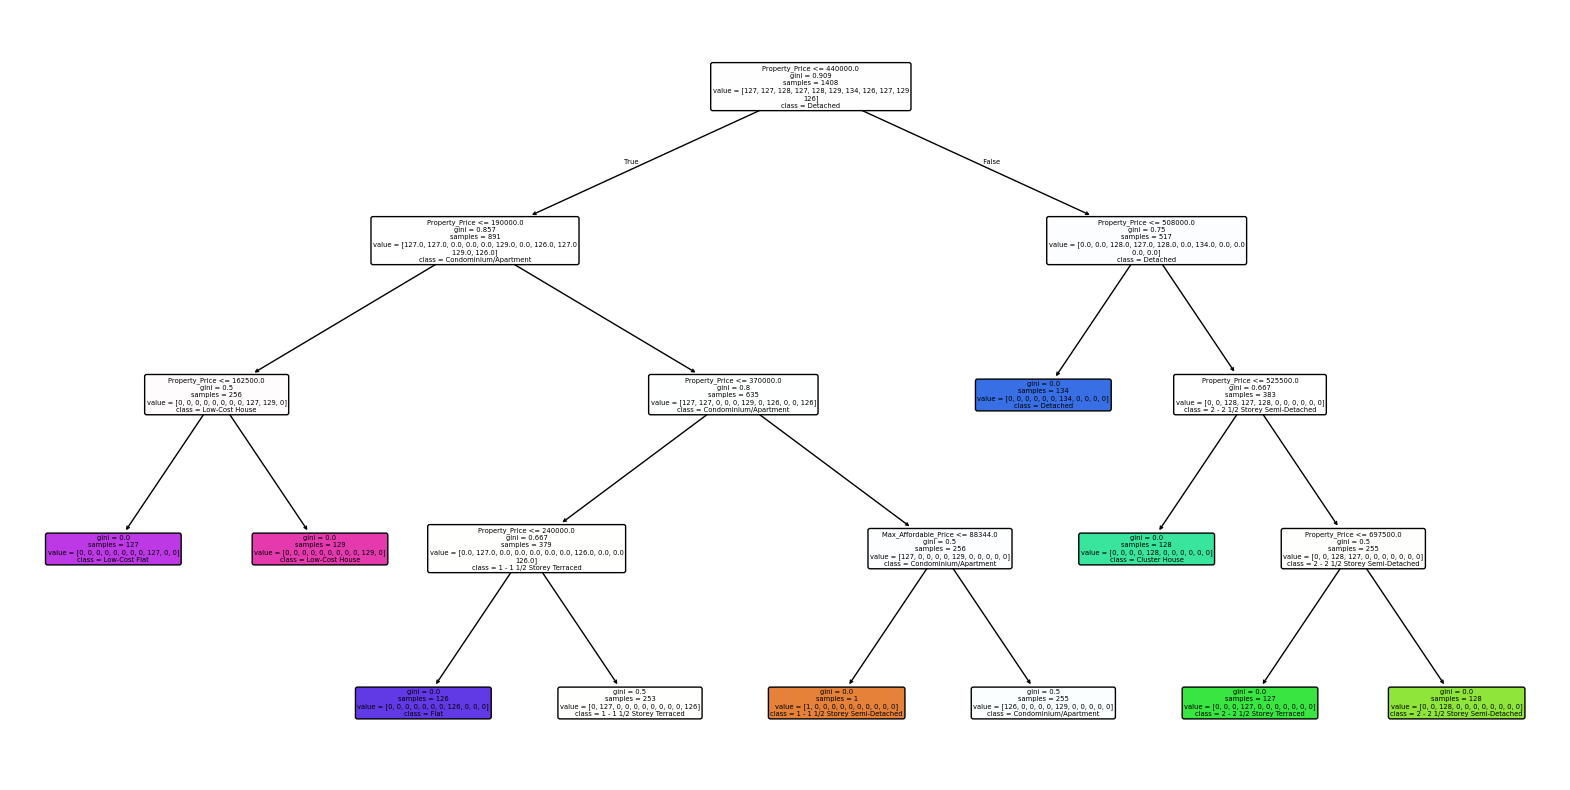


Feature Importance:
                Feature  Importance
2        Property_Price    0.999503
1  Max_Affordable_Price    0.000497
0         Annual_Income    0.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Load and prepare income data
income_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/hh_income_district.csv')
house_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv')

# Process 2022 income data
income_2022_df = income_df[income_df['date'] == '2022-01-01']
district_income_df = income_2022_df[['state', 'district', 'income_mean', 'income_median']]

# Calculate annual incomes and affordable prices
district_income_df['Annual Income (Mean)'] = district_income_df['income_mean'] * 12
district_income_df['Annual Income (Median)'] = district_income_df['income_median'] * 12
district_income_df['Max Affordable Price (Mean)'] = district_income_df['Annual Income (Mean)'] * 3
district_income_df['Max Affordable Price (Median)'] = district_income_df['Annual Income (Median)'] * 3

# Prepare features for each property type
property_features = []
for _, income_row in district_income_df.iterrows():
    max_price = income_row['Max Affordable Price (Median)']
    for _, house_row in house_df.iterrows():
        property_features.append({
            'District': income_row['district'],
            'Annual_Income': income_row['Annual Income (Median)'],
            'Max_Affordable_Price': max_price,
            'Property_Type': house_row['Property Type'],
            'Property_Price': house_row['Median Price'],
            'Is_Affordable': 1 if max_price >= house_row['Median Price'] else 0
        })

# Create features DataFrame
features_df = pd.DataFrame(property_features)

# Prepare for classification
X = features_df[['Annual_Income', 'Max_Affordable_Price', 'Property_Price']]
y = features_df['Property_Type']

# Encode property types
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.savefig('/content/drive/MyDrive/BTMH1023/property_decision_tree.png')
plt.show()

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

Q4 (c)_2

Build a random forest classifier to predict the type of house a worker can afford.

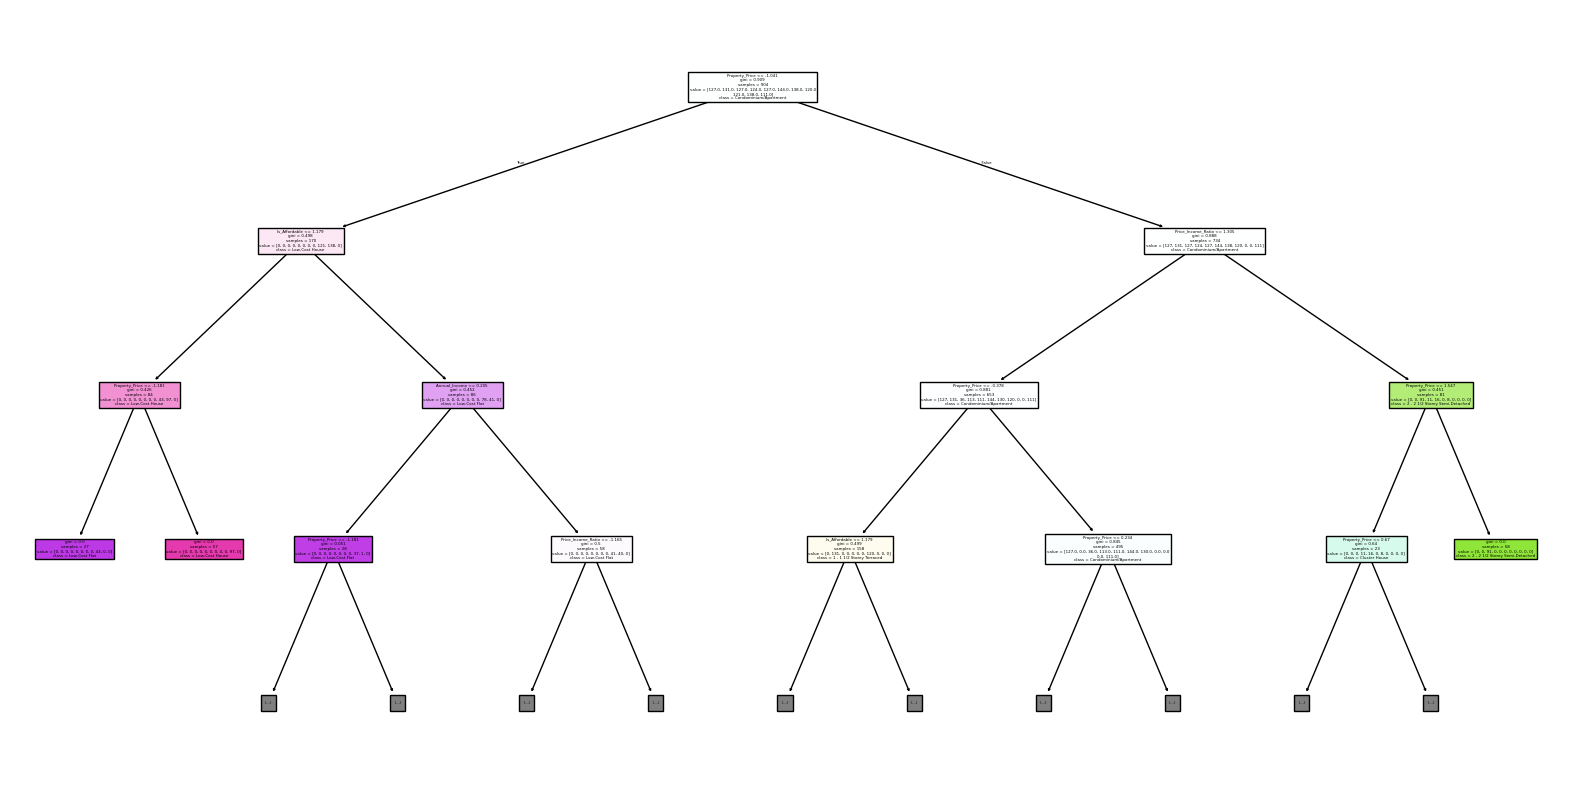

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                                precision    recall  f1-score   support

1 - 1 1/2 Storey Semi-Detached       0.12      0.12      0.12        33
     1 - 1 1/2 Storey Terraced       1.00      1.00      1.00        33
2 - 2 1/2 Storey Semi-Detached       1.00      1.00      1.00        32
     2 - 2 1/2 Storey Terraced       1.00      1.00      1.00        33
                 Cluster House       1.00      1.00      1.00        32
         Condominium/Apartment       0.06      0.06      0.06        31
                      Detached       1.00      1.00      1.00        26
                          Flat       1.00      1.00      1.00        34
                 Low-Cost Flat       1.00      1.00      1.00        33
                Low-Cost House       1.00      1.00      1.00        31
                    Town House       1.00      1.00      1.00        34

                      accuracy

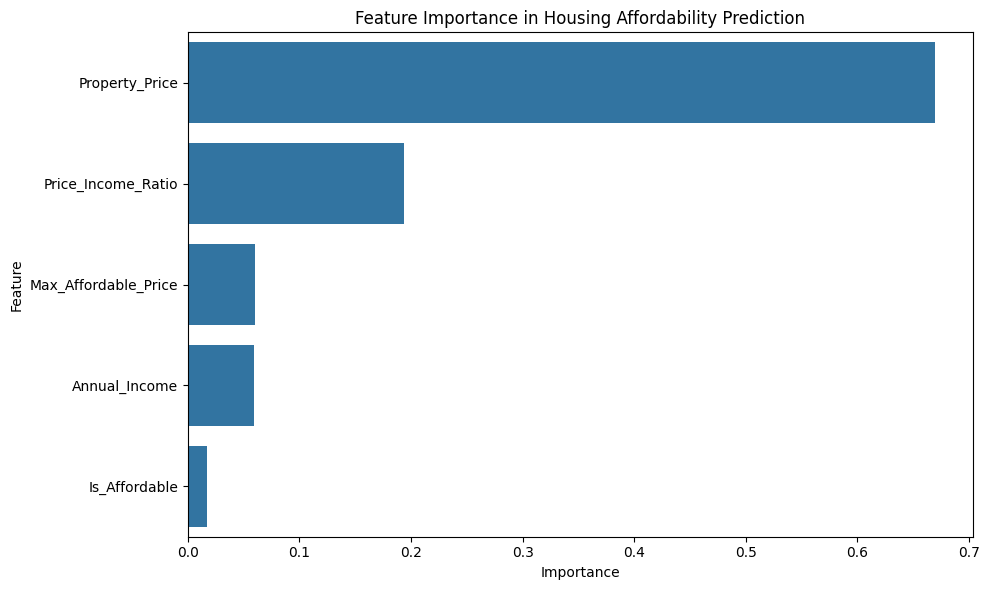

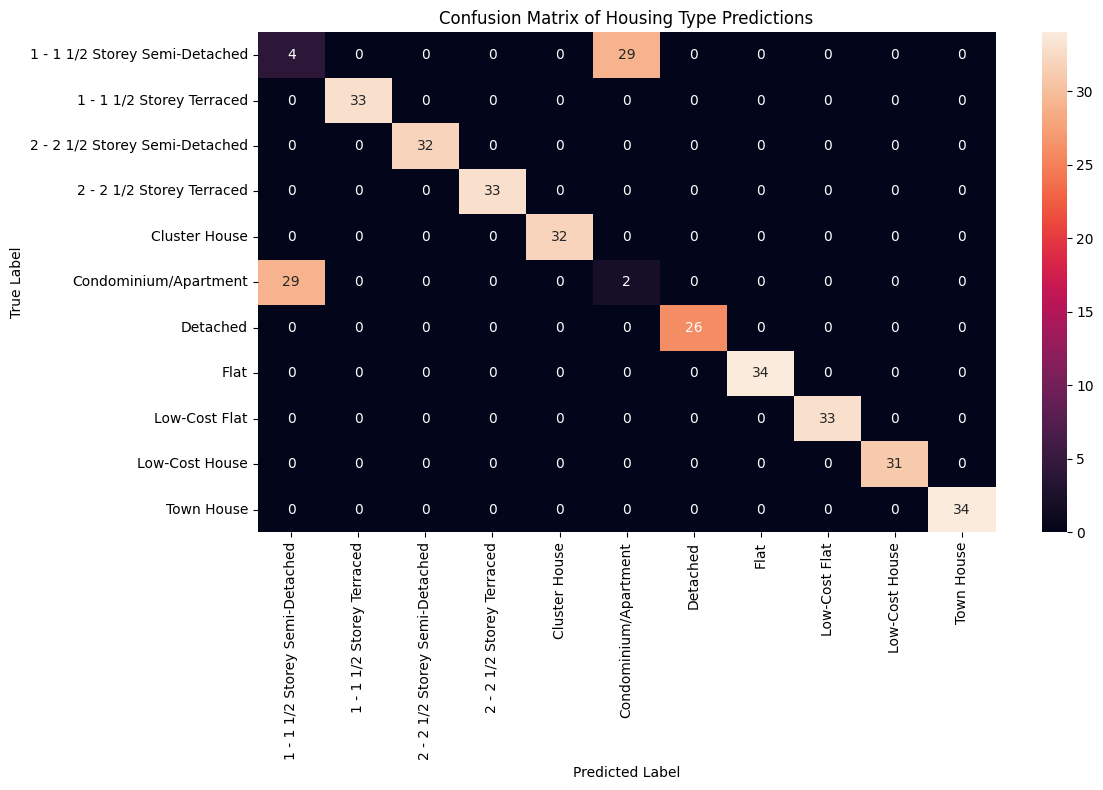

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
income_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/hh_income_district.csv')
house_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv')

income_2022_df = income_df[income_df['date'] == '2022-01-01']
district_income_df = income_2022_df[['state', 'district', 'income_mean', 'income_median']]
district_income_df['Annual_Income'] = district_income_df['income_median'] * 12
district_income_df['Max_Affordable_Price'] = district_income_df['Annual_Income'] * 3

# Create features
features = []
for _, income_row in district_income_df.iterrows():
    for _, house_row in house_df.iterrows():
        features.append({
            'Annual_Income': income_row['Annual_Income'],
            'Max_Affordable_Price': income_row['Max_Affordable_Price'],
            'Property_Price': house_row['Median Price'],
            'Price_Income_Ratio': house_row['Median Price'] / income_row['Annual_Income'],
            'Is_Affordable': 1 if income_row['Max_Affordable_Price'] >= house_row['Median Price'] else 0,
            'Property_Type': house_row['Property Type']
        })

features_df = pd.DataFrame(features)

# Prepare features
X = features_df[['Annual_Income', 'Max_Affordable_Price', 'Property_Price',
                 'Price_Income_Ratio', 'Is_Affordable']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
le = LabelEncoder()
y = le.fit_transform(features_df['Property_Type'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configure and train model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Visualize a single tree from the forest
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree
tree = grid_search.best_estimator_.estimators_[0]
plot_tree(tree,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          max_depth=3)
plt.savefig('random_tree.png', bbox_inches='tight', dpi=300)
plt.show()

# Evaluate
y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance in Housing Affordability Prediction')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BTMH1023/rf_feature_importance.png')
plt.show()

# Confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix of Housing Type Predictions')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BTMH1023/rf_confusion_matrix.png')
plt.show()

Q4 (d) Model evaluation with chart                                                                      


• Evaluate both models using appropriate metrics (Eg: accuracy,
confusion matrix)


• Compare the performance of the two models.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


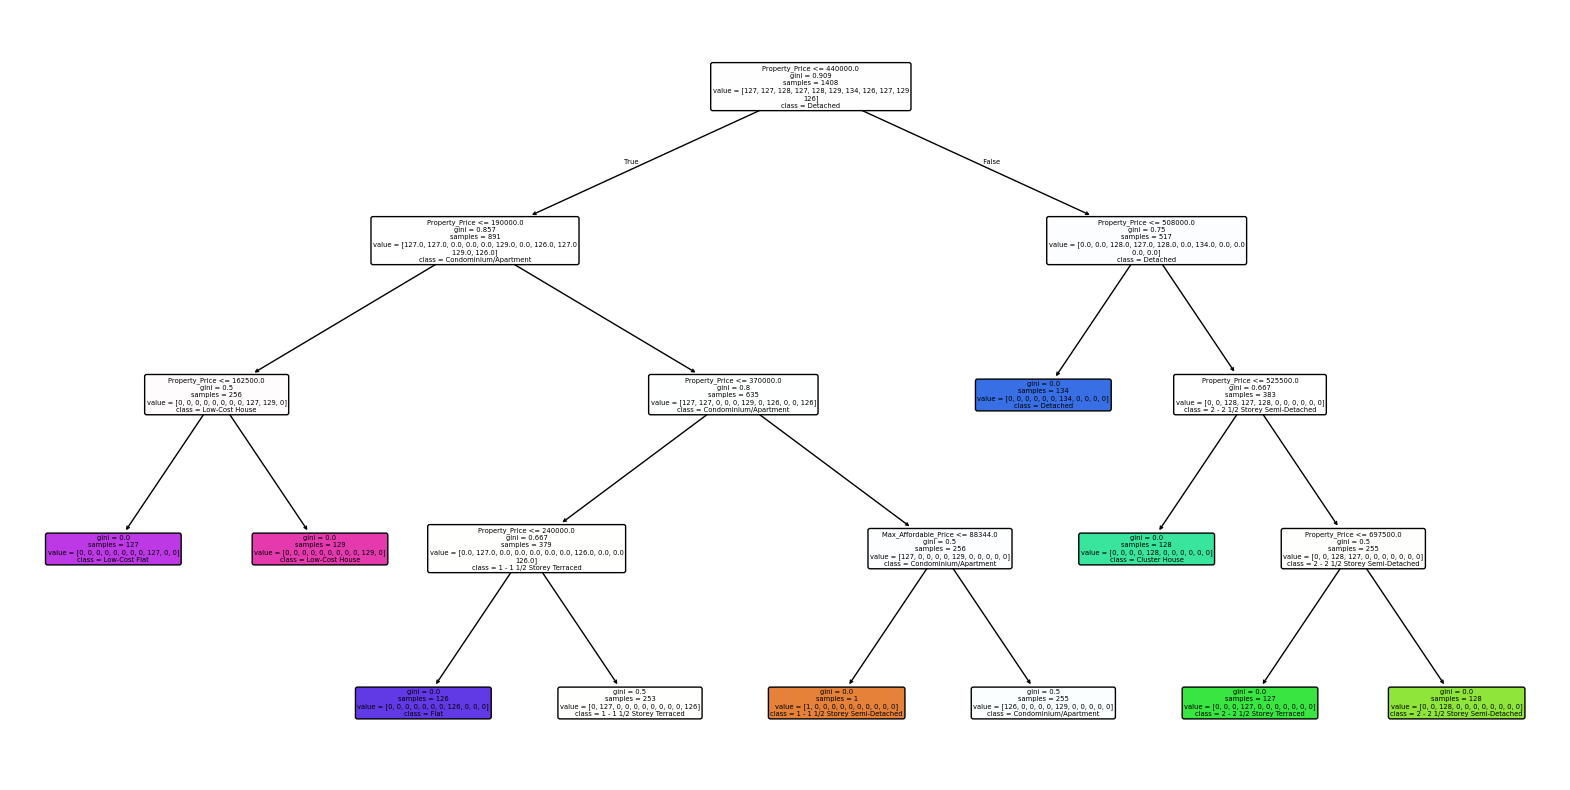


Decision Tree Feature Importance:
                Feature  Importance
2        Property_Price    0.999503
1  Max_Affordable_Price    0.000497
0         Annual_Income    0.000000


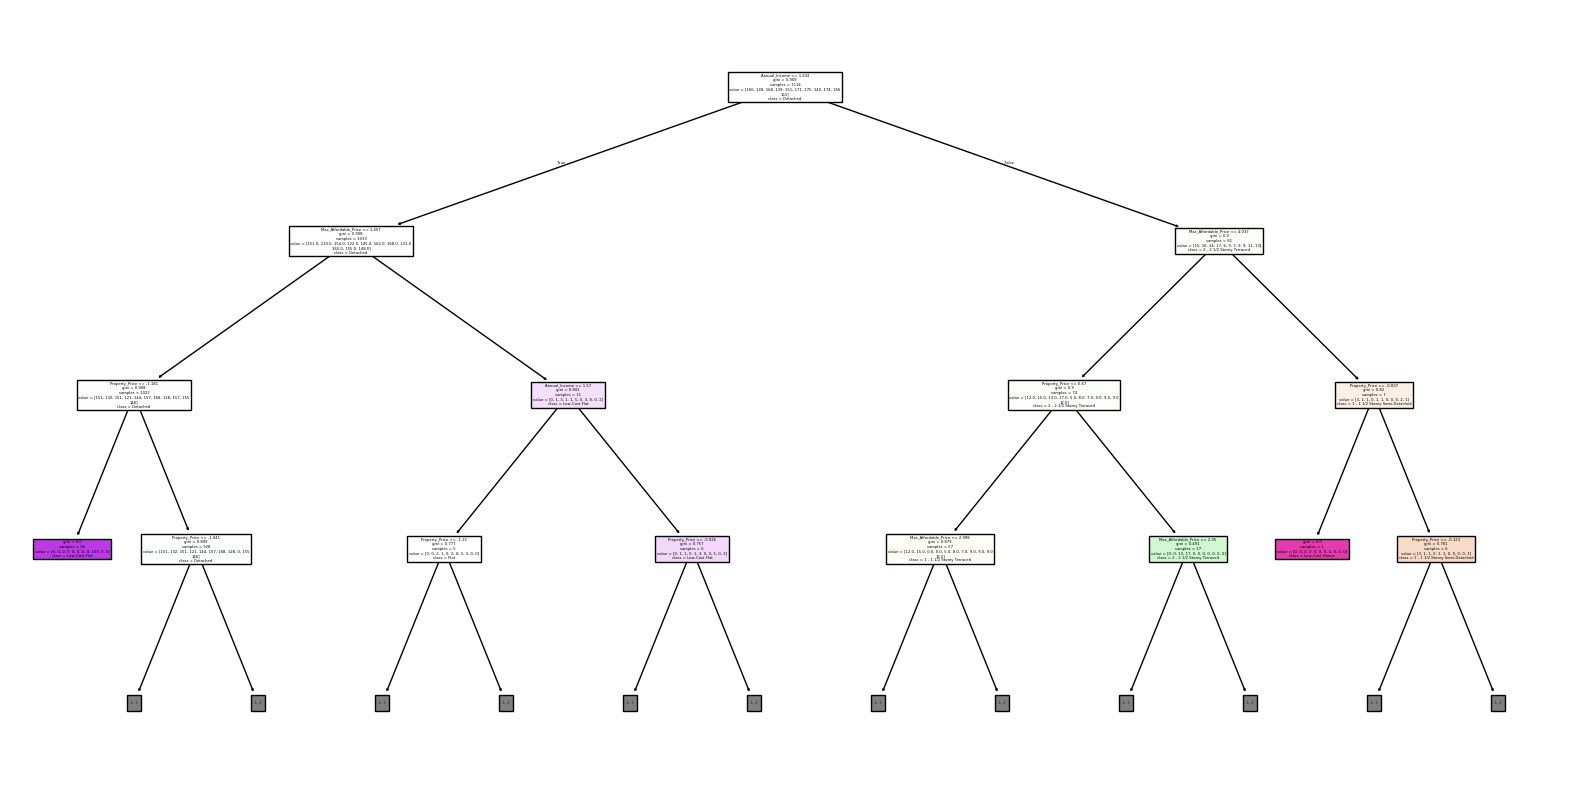

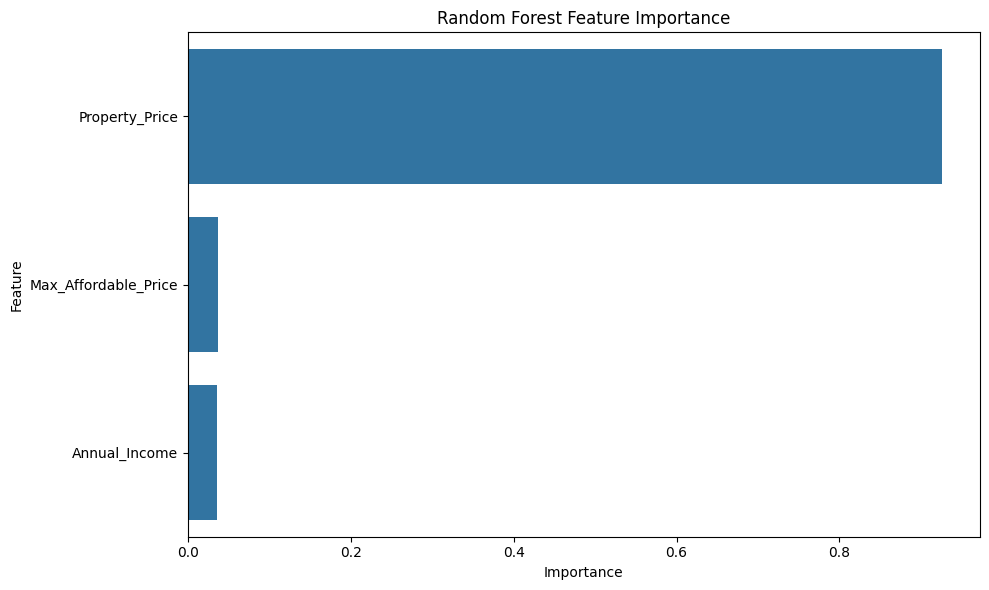

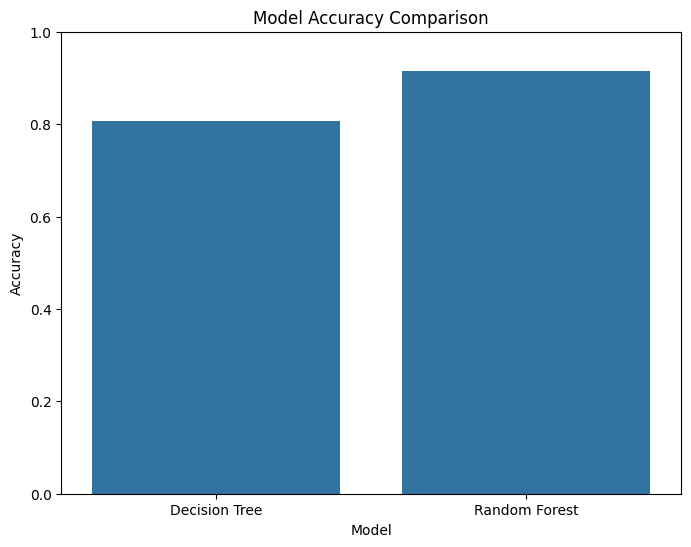


Model Performance Comparison:
--------------------------------------------------
Decision Tree Accuracy: 0.8068
Random Forest Accuracy: 0.9148

Decision Tree Classification Report:
                                precision    recall  f1-score   support

1 - 1 1/2 Storey Semi-Detached       0.00      0.00      0.00        33
     1 - 1 1/2 Storey Terraced       0.49      1.00      0.66        33
2 - 2 1/2 Storey Semi-Detached       1.00      1.00      1.00        32
     2 - 2 1/2 Storey Terraced       1.00      1.00      1.00        33
                 Cluster House       1.00      1.00      1.00        32
         Condominium/Apartment       0.48      0.97      0.64        31
                      Detached       1.00      1.00      1.00        26
                          Flat       1.00      1.00      1.00        34
                 Low-Cost Flat       1.00      1.00      1.00        33
                Low-Cost House       1.00      1.00      1.00        31
                    Town 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


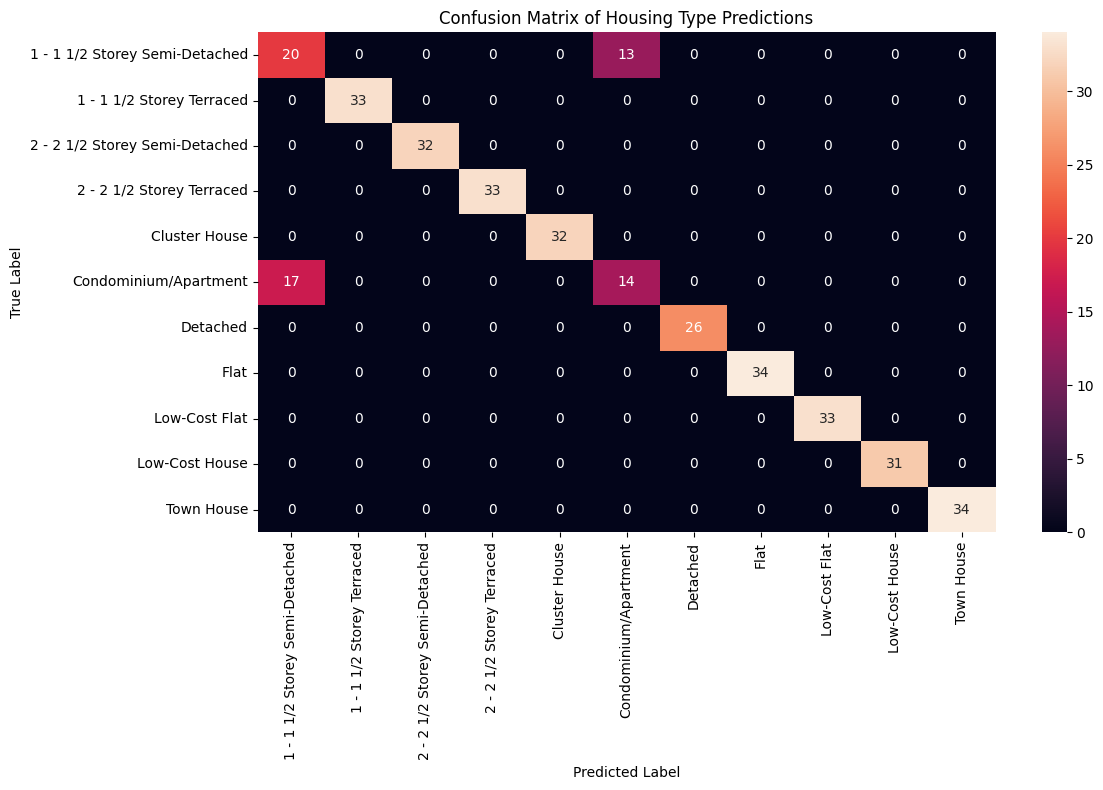


Detailed Model Comparison:
1. Accuracy Comparison:
   - Decision Tree: 0.8068
   - Random Forest: 0.9148
   - Difference: 0.1080

2. Top Features by Importance:
   Decision Tree:
   - Property_Price: 0.9995
   - Max_Affordable_Price: 0.0005
   - Annual_Income: 0.0000

   Random Forest:
   - Property_Price: 0.9262
   - Max_Affordable_Price: 0.0374
   - Annual_Income: 0.0364

3. Model Characteristics:
   Decision Tree:
   - Single tree with depth 4
   - More interpretable
   - Faster training and prediction

   Random Forest:
   - Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
   - More robust to outliers
   - Better generalization


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import importlib.util
import sys
import os
from google.colab import drive
drive.mount('/content/drive')


# Step 1: Load and preprocess data for classification
income_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/hh_income_district.csv')
house_df = pd.read_csv('/content/drive/MyDrive/BTMH1023/prices_stats_by_category.csv')

# Process 2022 income data
income_2022_df = income_df[income_df['date'] == '2022-01-01']
district_income_df = income_2022_df[['state', 'district', 'income_mean', 'income_median']]
district_income_df['Annual Income (Mean)'] = district_income_df['income_mean'] * 12
district_income_df['Annual Income (Median)'] = district_income_df['income_median'] * 12
district_income_df['Max Affordable Price (Mean)'] = district_income_df['Annual Income (Mean)'] * 3
district_income_df['Max Affordable Price (Median)'] = district_income_df['Annual Income (Median)'] * 3

# Step 2: Prepare features for each property type
property_features = []
for _, income_row in district_income_df.iterrows():
    max_price = income_row['Max Affordable Price (Median)']
    for _, house_row in house_df.iterrows():
        property_features.append({
            'District': income_row['district'],
            'Annual_Income': income_row['Annual Income (Median)'],
            'Max_Affordable_Price': max_price,
            'Property_Type': house_row['Property Type'],
            'Property_Price': house_row['Median Price'],
            'Is_Affordable': 1 if max_price >= house_row['Median Price'] else 0
        })

# Create features DataFrame
features_df = pd.DataFrame(property_features)

# Step 3: Prepare data for Decision Tree and Random Forest models
X = features_df[['Annual_Income', 'Max_Affordable_Price', 'Property_Price']]
y = features_df['Property_Type']

# Encode property types
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.savefig('/content/drive/MyDrive/BTMH1023/property_decision_tree.png')
plt.show()

# Step 6: Print Decision Tree feature importance
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})
print("\nDecision Tree Feature Importance:")
print(dt_importance.sort_values('Importance', ascending=False))

# Step 7: Train Random Forest Classifier with Grid Search
# Scaling the features for better performance with Random Forest
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Step 8: Visualize a tree from Random Forest
plt.figure(figsize=(20, 10))
tree = grid_search.best_estimator_.estimators_[0]
plot_tree(tree, feature_names=X.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.savefig('/content/drive/MyDrive/BTMH1023/random_tree.png', bbox_inches='tight', dpi=300)
plt.show()

# Step 9: Print Random Forest feature importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BTMH1023/rf_feature_importance.png')
plt.show()

# Step 10: Evaluate models
# Decision Tree Predictions
dt_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest Predictions
X_test_scaled = scaler.transform(X_test)  # Scale the test set
rf_pred = grid_search.predict(X_test_scaled)  # Predict using the scaled test set

rf_accuracy = accuracy_score(y_test, rf_pred)

# Step 11: Print Model Accuracy Comparison
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.savefig('/content/drive/MyDrive/BTMH1023/model_comparison.png')
plt.show()

# Print detailed comparison
print("\nModel Performance Comparison:")
print("-" * 50)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred, target_names=le.classes_))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

# Step 12: Confusion Matrix for Random Forest
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix of Housing Type Predictions')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BTMH1023/rf_confusion_matrix.png')
plt.show()

# Print additional comparisons
print("\nDetailed Model Comparison:")
print("=" * 50)
print("1. Accuracy Comparison:")
print(f"   - Decision Tree: {dt_accuracy:.4f}")
print(f"   - Random Forest: {rf_accuracy:.4f}")
print(f"   - Difference: {abs(dt_accuracy - rf_accuracy):.4f}")

print("\n2. Top Features by Importance:")
print("   Decision Tree:")
for _, row in dt_importance.nlargest(3, 'Importance').iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")
print("\n   Random Forest:")
for _, row in rf_importance.nlargest(3, 'Importance').iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n3. Model Characteristics:")
print("   Decision Tree:")
print("   - Single tree with depth 4")
print("   - More interpretable")
print("   - Faster training and prediction")

print("\n   Random Forest:")
print("   - Best parameters:", grid_search.best_params_)
print("   - More robust to outliers")
print("   - Better generalization")
